In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import math
import matplotlib
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("ObesityDataSet.csv")

In [3]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<AxesSubplot:xlabel='Age', ylabel='Count'>

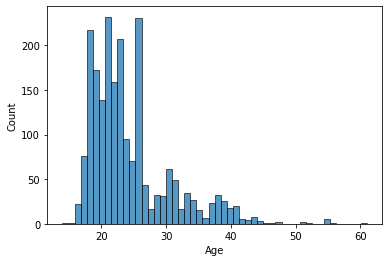

In [6]:
sns.histplot(data=data, x="Age")

<AxesSubplot:>

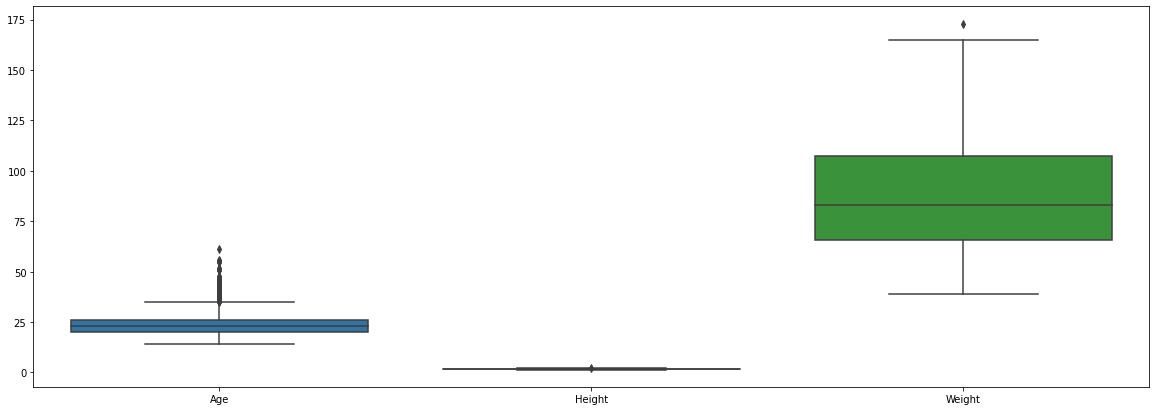

In [7]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data.iloc[:, 1:4])

<AxesSubplot:>

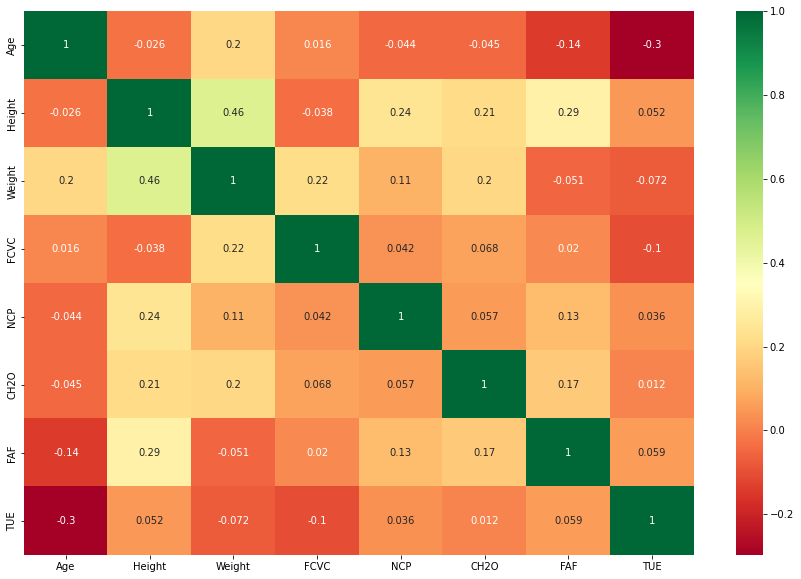

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn') 

In [9]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = encoder.fit_transform(data['FAVC'])
data['CAEC'] = encoder.fit_transform(data['CAEC'])
data['SMOKE'] = encoder.fit_transform(data['SMOKE'])
data['SCC'] = encoder.fit_transform(data['SCC'])
data['CALC'] = encoder.fit_transform(data['CALC'])
data['MTRANS'] = encoder.fit_transform(data['MTRANS'])
data['NObeyesdad'] = encoder.fit_transform(data['NObeyesdad'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int32  
 5   FAVC                            2111 non-null   int32  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int32  
 9   SMOKE                           2111 non-null   int32  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int32  
 12  FAF                             21

In [11]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
dt_predictions = dt_clf.predict(X_test)

In [14]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)

In [15]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)

In [16]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)

In [17]:
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.90      0.89      0.89        62
           2       0.96      0.94      0.95        78
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        63
           5       0.90      0.93      0.91        56
           6       0.98      0.94      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



In [18]:
print("Logistic Regression Classifier:")
print(classification_report(y_test, lr_predictions))

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.74      0.93      0.83        56
           1       0.53      0.42      0.47        62
           2       0.58      0.60      0.59        78
           3       0.82      0.84      0.83        58
           4       0.90      1.00      0.95        63
           5       0.54      0.38      0.44        56
           6       0.35      0.38      0.37        50

    accuracy                           0.65       423
   macro avg       0.64      0.65      0.64       423
weighted avg       0.64      0.65      0.64       423



In [19]:
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        56
           1       0.89      0.95      0.92        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.93      0.89      0.91        56
           6       0.98      0.98      0.98        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.97      0.96      0.96       423



In [20]:
print("SVM Classifier:")
print(classification_report(y_test, svm_predictions))

SVM Classifier:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        56
           1       0.48      0.34      0.40        62
           2       0.65      0.33      0.44        78
           3       0.77      0.41      0.54        58
           4       0.56      1.00      0.72        63
           5       0.47      0.48      0.47        56
           6       0.43      0.58      0.49        50

    accuracy                           0.57       423
   macro avg       0.58      0.57      0.55       423
weighted avg       0.59      0.57      0.54       423

